In [1]:
#IMPORTING THE LIBRARIES
import tensorflow as tf
from tensorflow import keras

In [2]:
#IMPORTING THE LIBRARIES
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

2.1.0


In [4]:
#IMPORTING THE DATASET
fashion_mnist= keras.datasets.fashion_mnist

In [5]:
#SPLITTING INTO DATASET INTO TRAIN-TEST SUBSETS
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [14]:
class_names= ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [15]:
train_images.shape

(60000, 28, 28)

In [17]:
len(train_labels)

60000

In [18]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [19]:
test_images.shape

(10000, 28, 28)

In [20]:
len(test_labels)

10000

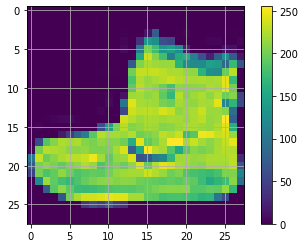

In [22]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(True)
plt.show()

In [23]:
train_images = train_images/255.0
test_images = test_images/255.0

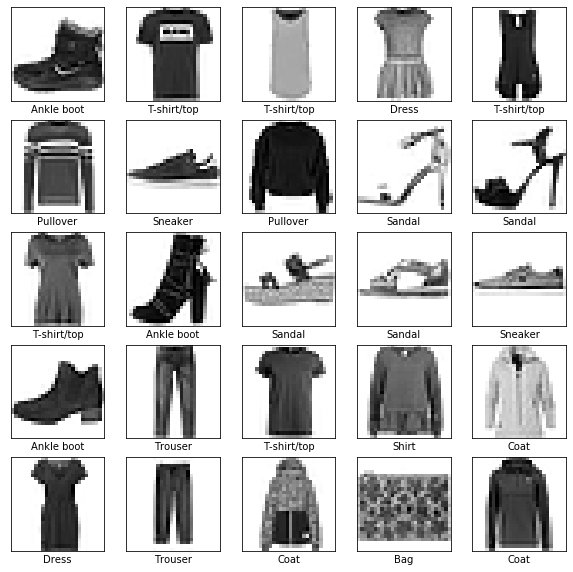

In [25]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


    

In [26]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [27]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [28]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 155us/sample - loss: 0.4973 - accuracy: 0.8259
Epoch 2/10
60000/60000 [==============================] - 8s 134us/sample - loss: 0.3714 - accuracy: 0.8653
Epoch 3/10
60000/60000 [==============================] - 8s 130us/sample - loss: 0.3342 - accuracy: 0.8789
Epoch 4/10
60000/60000 [==============================] - 7s 115us/sample - loss: 0.3121 - accuracy: 0.8857
Epoch 5/10
60000/60000 [==============================] - 7s 124us/sample - loss: 0.2945 - accuracy: 0.8908
Epoch 6/10
60000/60000 [==============================] - 8s 137us/sample - loss: 0.2800 - accuracy: 0.8965
Epoch 7/10
60000/60000 [==============================] - 8s 141us/sample - loss: 0.2665 - accuracy: 0.9022
Epoch 8/10
60000/60000 [==============================] - 8s 127us/sample - loss: 0.2584 - accuracy: 0.9043
Epoch 9/10
60000/60000 [==============================] - 9s 147us/sample - loss: 0.2483 - accuracy: 0.9081
Epoch

In [29]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print('Test accuracy: ', test_accuracy)

10000/10000 [==============================] - 1s 76us/sample - loss: 0.3306 - accuracy: 0.8857
Test accuracy:  0.8857


In [30]:
predictions = model.predict(test_images)

In [31]:
predictions[0]

array([1.1145073e-09, 1.4682903e-13, 3.4823039e-10, 3.1115989e-12,
       3.0204259e-11, 3.0445674e-04, 2.4399138e-09, 1.1636283e-03,
       8.5592318e-11, 9.9853194e-01], dtype=float32)

In [32]:
np.argmax(predictions[0])

9

In [34]:
test_labels[0]

9

In [43]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(True)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color='blue'
    else:
        color='red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                   100*np.max(predictions_array), class_names[true_label]), 
                                   color=color)
        
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(True)
    plt.xticks([])
    plt.yticks([])
    
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')
    

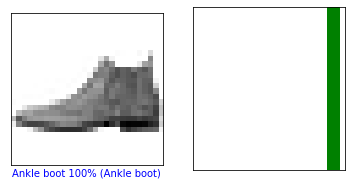

In [44]:
i=0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

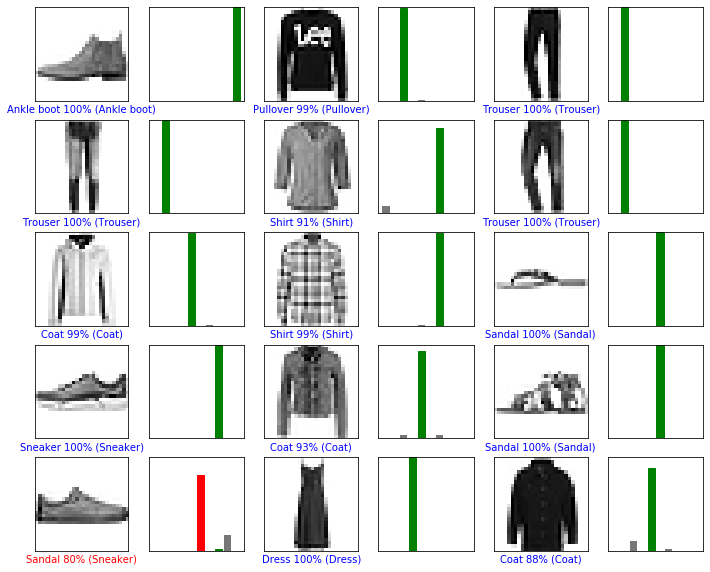

In [45]:
num_rows=5
num_cols=3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()
    

In [46]:
img = test_images[0]
print(img.shape)

(28, 28)


In [47]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [48]:
predictions_single = model.predict(img)
print(predictions_single)

[[1.1145073e-09 1.4682903e-13 3.4823039e-10 3.1116108e-12 3.0204259e-11
  3.0445645e-04 2.4399138e-09 1.1636289e-03 8.5591992e-11 9.9853194e-01]]


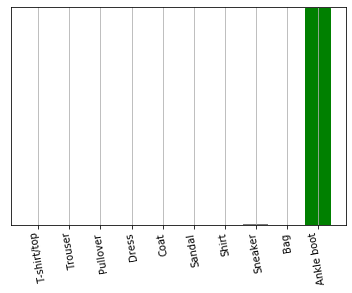

In [50]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=100)

In [51]:
np.argmax(predictions_single[0])

9